In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
sns.set_style('dark')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [77]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_predict

In [78]:
# View all columns on the screen
pd.set_option('max_columns', 100)

### 1. Load the Data2.csv file

In [79]:
# Import in the Second csv file
df = pd.read_csv('../Data/Data2.csv')
df.head()

,Target,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A24,A23,A22
0,1,18,1049,21,1,1,1,4,2,1,2,4,2,1,2,4,3,1,3,1,1,A,C,A,B
1,1,9,2799,36,2,2,1,4,0,1,3,2,3,1,1,2,3,1,3,1,1,C,D,C,D
2,1,12,841,23,1,1,2,2,9,2,4,2,2,1,1,4,3,1,2,1,1,C,D,C,B
3,1,12,2122,39,2,2,1,4,0,1,3,3,3,1,1,2,3,1,2,1,2,C,C,D,C
4,1,12,2171,38,2,1,1,4,0,1,3,4,3,1,2,4,1,2,2,1,2,B,D,D,D


### Exploratory Data Analysis

In [80]:
# Check size and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
Target    1000 non-null int64
A1        1000 non-null int64
A2        1000 non-null int64
A3        1000 non-null int64
A4        1000 non-null int64
A5        1000 non-null int64
A6        1000 non-null int64
A7        1000 non-null int64
A8        1000 non-null int64
A9        1000 non-null int64
A10       1000 non-null int64
A11       1000 non-null int64
A12       1000 non-null int64
A13       1000 non-null int64
A14       1000 non-null int64
A15       1000 non-null int64
A16       1000 non-null int64
A17       1000 non-null int64
A18       1000 non-null int64
A19       1000 non-null int64
A20       1000 non-null int64
A21       1000 non-null object
A24       1000 non-null object
A23       1000 non-null object
A22       1000 non-null object
dtypes: int64(21), object(4)
memory usage: 195.4+ KB


In [81]:
# Check for nulls
df.isnull().any()

Target    False
A1        False
A2        False
A3        False
A4        False
A5        False
A6        False
A7        False
A8        False
A9        False
A10       False
A11       False
A12       False
A13       False
A14       False
A15       False
A16       False
A17       False
A18       False
A19       False
A20       False
A21       False
A24       False
A23       False
A22       False
dtype: bool

In [82]:
# Second check for non-nulls
df.count()

Target    1000
A1        1000
A2        1000
A3        1000
A4        1000
A5        1000
A6        1000
A7        1000
A8        1000
A9        1000
A10       1000
A11       1000
A12       1000
A13       1000
A14       1000
A15       1000
A16       1000
A17       1000
A18       1000
A19       1000
A20       1000
A21       1000
A24       1000
A23       1000
A22       1000
dtype: int64

In [83]:
# Let's describe the features of the dataset
df.describe()

,Target,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,20.903000,3271.24800,35.54200,1.407000,1.155000,2.577000,2.54500,2.828000,2.105000,3.384000,2.973000,2.68200,1.145000,2.358000,2.845000,2.675000,1.928000,2.904000,1.404000,1.037000
std,0.458487,12.058814,2822.75176,11.35267,0.577654,0.362086,1.257638,1.08312,2.744439,1.580023,1.208306,1.118715,0.70808,0.477706,1.050209,1.103718,0.705601,0.530186,0.653614,0.490943,0.188856
min,0.000000,4.000000,250.00000,19.00000,1.000000,1.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.50000,27.00000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,3.000000,2.000000,2.00000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000
50%,1.000000,18.000000,2319.50000,33.00000,1.000000,1.000000,2.000000,2.00000,2.000000,1.000000,3.000000,3.000000,3.00000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.25000,42.00000,2.000000,1.000000,4.000000,4.00000,3.000000,3.000000,5.000000,4.000000,3.00000,1.000000,3.000000,4.000000,3.000000,2.000000,3.000000,2.000000,1.000000
max,1.000000,72.000000,18424.00000,75.00000,4.000000,2.000000,4.000000,4.00000,10.000000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000


In [84]:
# How many 0s are in A7?
df.A7.value_counts()

2    530
4    293
3     88
1     49
0     40
Name: A7, dtype: int64

In [85]:
# How many 0s are in A8?
df.A8.value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: A8, dtype: int64

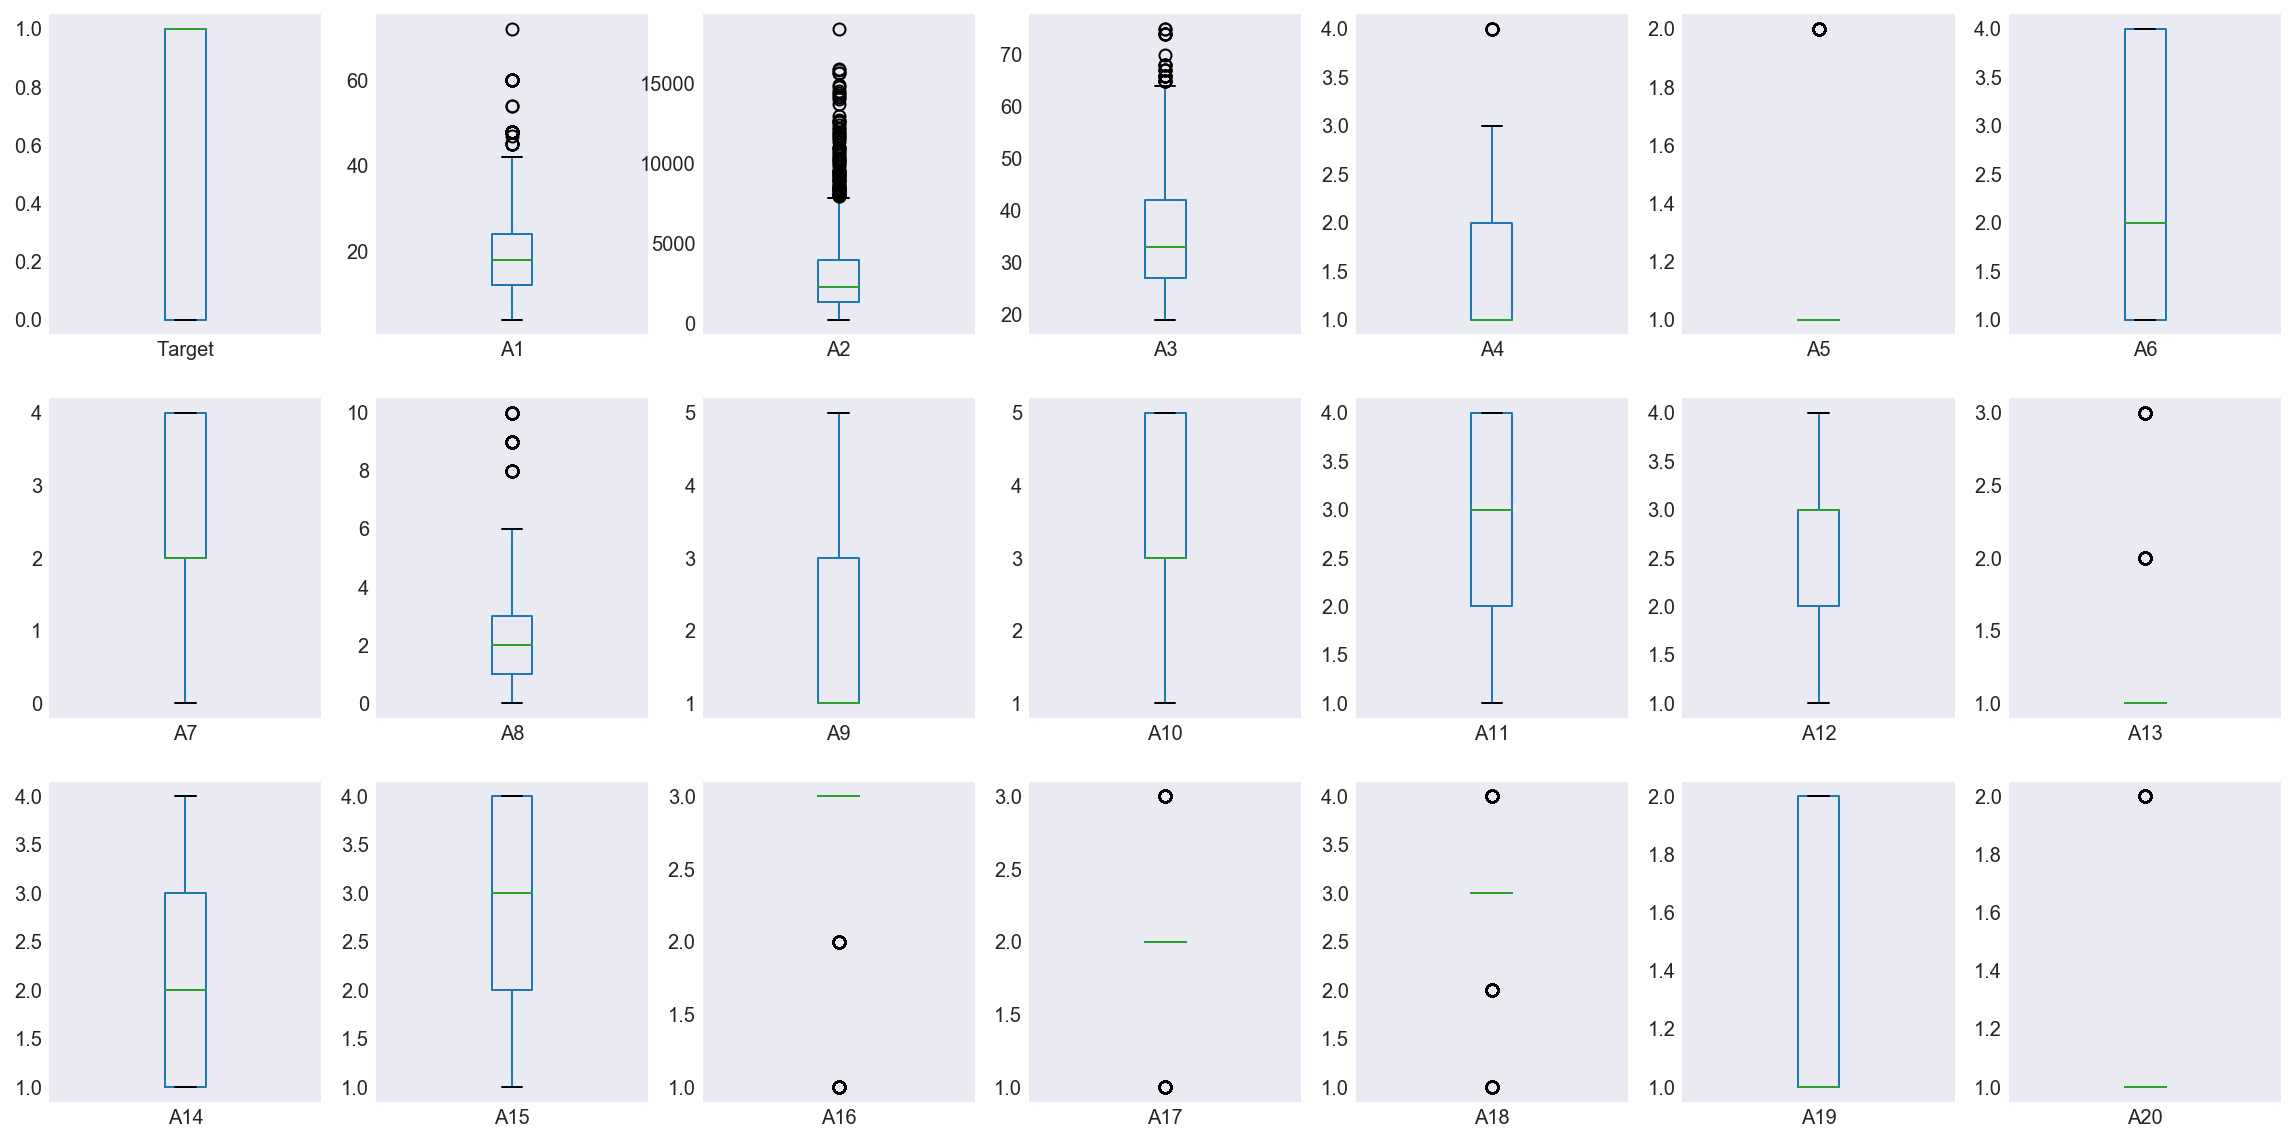

In [86]:
# Boxplot to check the distribution of numeric features
fig,ax = plt.subplots(figsize=(20,10))
df.plot(kind='box', subplots=True, layout=(3,7), ax=ax)
None

In [87]:
# Are the features normally distributed?
sns.pairplot(df)
None

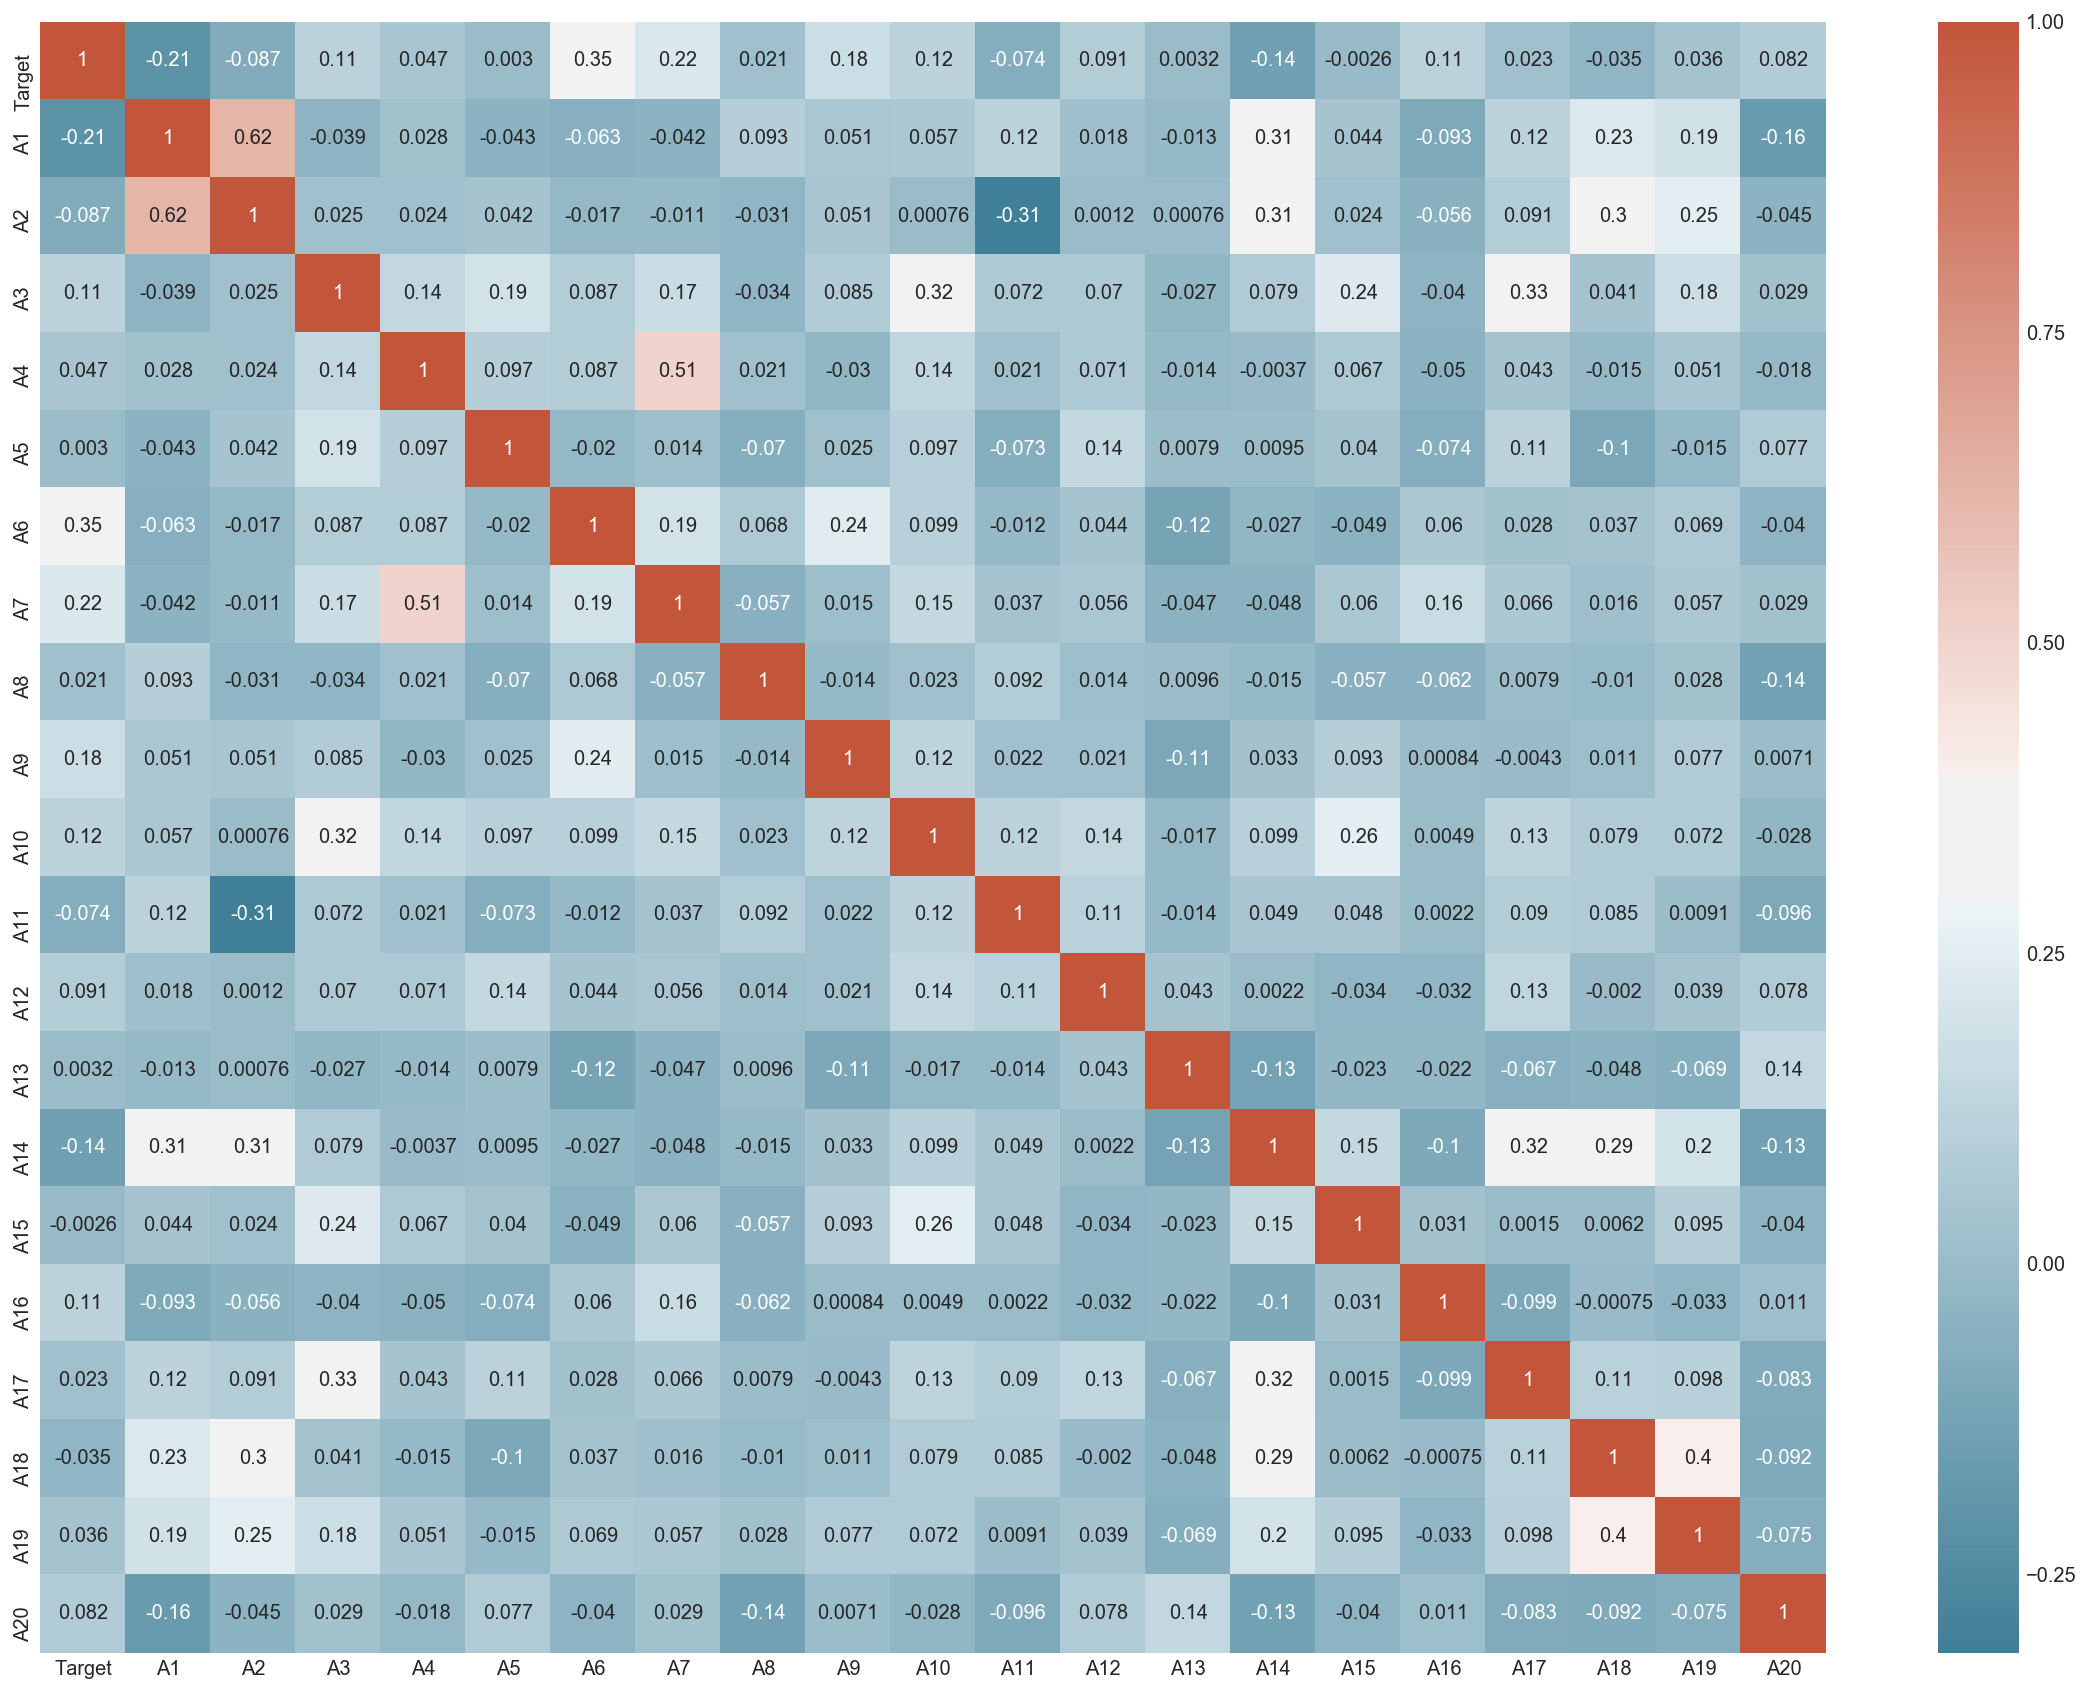

In [88]:
# Heatmap of all numerical features with the target variable to see their correlations
(fig, ax) = plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(225, 20, sep=20, as_cmap=True)
sns.heatmap(df.corr('spearman'), cmap=cmap, annot=True, ax=ax)
None

**Notes:**

1. From measures of central tendency and dispersion, scales of A1, A2 and A3 are larger than A4, A5 etc
2. **A2** in particular has a number of outliers that are much larger than the mean
2. Looking at data types, **A21 - A24** are of type string
3. For A7 and A8 the minimum value is 0. Assume this DOES NOT represent NULL value
4. Strongest correlations between **A1** & **A2** as well as **A4** & **A7**. Low multicollinearity expected.

**Pre-pocessing:**
* Standardize all features using RobustScaler - StandardScaler not applicable since features not normally distributed
* Categorize (create dummy variables) for A21-A24
* Use 10 Fold Cross Validation to avoid overfitting
* Build ROC Curves with Logistic Classifier - simplest model

### 2. Build a classifier to predict the target variable, which is 0 or 1
---

In [89]:
# Let's get an understanding of how many 1s and 0s there are in the target variable
df.Target.value_counts()

1    700
0    300
Name: Target, dtype: int64

**Observation:**

70% of the Target variable is 1, so there is an **imbalanced class** problem. A model that predicts the Target is ***all*** 1 will have an accuracy of 70%.

In [90]:
target = df.Target
features = df.iloc[:,1:]
features.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A24,A23,A22
0,18,1049,21,1,1,1,4,2,1,2,4,2,1,2,4,3,1,3,1,1,A,C,A,B
1,9,2799,36,2,2,1,4,0,1,3,2,3,1,1,2,3,1,3,1,1,C,D,C,D
2,12,841,23,1,1,2,2,9,2,4,2,2,1,1,4,3,1,2,1,1,C,D,C,B
3,12,2122,39,2,2,1,4,0,1,3,3,3,1,1,2,3,1,2,1,2,C,C,D,C
4,12,2171,38,2,1,1,4,0,1,3,4,3,1,2,4,1,2,2,1,2,B,D,D,D


In [91]:
# Create dummy variables for last 4 features
feature_dummies = pd.get_dummies(df[['A21','A24','A23','A22']], drop_first=True)
feature_dummies.head()

,A21_B,A21_C,A21_D,A24_B,A24_C,A24_D,A23_B,A23_C,A23_D,A22_B,A22_C,A22_D
0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,1,0,1,0,0,0,1
2,0,1,0,0,0,1,0,1,0,1,0,0
3,0,1,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,1,0,0,1,0,0,1


In [92]:
# Drop last four columns from features
featuresdf = features.drop(['A21','A24','A23','A22'], axis=1)
# Add Categorical Features back in
featuresdf2 = pd.concat([featuresdf, feature_dummies.reset_index()], axis=1)
featuresdf2.drop('index',axis=1,inplace=True)
# Updated feature list
featuresdf2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21_B,A21_C,A21_D,A24_B,A24_C,A24_D,A23_B,A23_C,A23_D,A22_B,A22_C,A22_D
0,18,1049,21,1,1,1,4,2,1,2,4,2,1,2,4,3,1,3,1,1,0,0,0,0,1,0,0,0,0,1,0,0
1,9,2799,36,2,2,1,4,0,1,3,2,3,1,1,2,3,1,3,1,1,0,1,0,0,0,1,0,1,0,0,0,1
2,12,841,23,1,1,2,2,9,2,4,2,2,1,1,4,3,1,2,1,1,0,1,0,0,0,1,0,1,0,1,0,0
3,12,2122,39,2,2,1,4,0,1,3,3,3,1,1,2,3,1,2,1,2,0,1,0,0,1,0,0,0,1,0,1,0
4,12,2171,38,2,1,1,4,0,1,3,4,3,1,2,4,1,2,2,1,2,1,0,0,0,0,1,0,0,1,0,0,1


In [93]:
# Standardize Features Matrix using RobustScaler to take care of any outliers
scaler = RobustScaler()
rescaled_features = scaler.fit_transform(featuresdf2)
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaled_features[0:5,:])

[[ 0.    -0.487 -0.8    0.     0.    -0.333  1.     0.     0.    -0.5    0.5
  -1.     0.     0.     0.5    0.    -1.     0.     0.     0.     0.    -1.
   0.     0.     0.     0.     0.     0.     0.     1.     0.    -1.   ]
 [-0.75   0.184  0.2    1.     1.    -0.333  1.    -1.     0.     0.    -0.5
   0.     0.    -0.5   -0.5    0.    -1.     0.     0.     0.     0.     0.
   0.     0.    -1.     1.     0.     1.     0.     0.     0.     0.   ]
 [-0.5   -0.567 -0.667  0.     0.     0.     0.     3.5    0.5    0.5   -0.5
  -1.     0.    -0.5    0.5    0.    -1.    -1.     0.     0.     0.     0.
   0.     0.    -1.     1.     0.     1.     0.     1.     0.    -1.   ]
 [-0.5   -0.076  0.4    1.     1.    -0.333  1.    -1.     0.     0.     0.
   0.     0.    -0.5   -0.5    0.    -1.    -1.     0.     1.     0.     0.
   0.     0.     0.     0.     0.     0.     1.     0.     1.    -1.   ]
 [-0.5   -0.057  0.333  1.     0.    -0.333  1.    -1.     0.     0.     0.5
   0.     0.     0. 

### 3. Dummy Classifier
---

In [94]:
# Train-Test Split with Dummy Classifer, which just takes the means of all features as regressors
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
test_size = 0.33
seed = 123
X_train, X_test, y_train, y_test = train_test_split(rescaled_features, target,
                                                   test_size=test_size, random_state=seed)
dummy.fit(X_train, y_train)
result = dummy.score(X_test, y_test)
print("Dummy Accuracy: %.3f%%") % (result*100.0)

Dummy Accuracy: 57.879%


In [95]:
# Accuracy is not the best evaluation metric given imbalanced classes. Look at area under ROC curve.
num_folds = 10
seed = 123
scoring = 'roc_auc'
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
dummy = DummyClassifier()
results = cross_val_score(dummy, rescaled_features, target, cv=kfold, scoring=scoring)
print("AUC: %.3f%% (%.3f%%)") % (results.mean(), results.std())

AUC: 0.487% (0.045%)


In [96]:
# Train Test Split with a Logistic Classifier
test_size = 0.33
seed = 123
X_train, X_test, y_train, y_test = train_test_split(rescaled_features, target, 
                                                    test_size=test_size, random_state=seed)
logreg = LogisticRegression()
# Fit on the training dataset
logreg.fit(X_train, y_train)
# Score on the test dataset
result = logreg.score(X_test, y_test)
print("Accuracy: %.3f%%") % (result*100.0)

Accuracy: 78.182%


In [97]:
# Evaluate using a 10 Fold Cross Validation Model
num_folds = 10
seed = 123
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
logreg = LogisticRegression()
results = cross_val_score(logreg, rescaled_features, target, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)

Accuracy: 74.900% (7.726%)


Using a 10 fold cross validation, our accuracy is closer to 75%! A better scoring metric might be the area under the ROC curve in this case. This is also 75%.

In [98]:
num_folds = 10
seed = 123
scoring = 'roc_auc'
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
logreg = LogisticRegression()
results = cross_val_score(logreg, rescaled_features, target, cv=kfold, scoring=scoring)
print("AUC: %.3f%% (%.3f%%)") % (results.mean(), results.std())

AUC: 0.752% (0.113%)


### 4. Hyperparameter Tuning
---

In [99]:
# Let's hypertune the parameters of our Logistic Classifier
test_size = 0.33
seed = 123
num_folds = 10
X_train, X_test, y_train, y_test = train_test_split(rescaled_features, target, 
                                                    test_size=test_size, random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
scoring = 'roc_auc'

logreg_gridsearch = GridSearchCV(LogisticRegression(), 
                                 param_grid={'penalty' : ['l1','l2'],
                                'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                                cv=kfold, n_jobs=-1, verbose=1, scoring=scoring)
logreg_gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [100]:
logreg_gridsearch.best_score_

0.75959657201116471

In [101]:
logreg_gridsearch.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [102]:
# Refining C using the gradient descent algorithm which nudges the coefficients to be better
lr_gridsearch = GridSearchCV(LogisticRegression(), 
                             param_grid={'penalty' : ['l1','l2'],
                            'C' : [0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.15, 0.02]},
                            cv=kfold, n_jobs=-1, verbose=1, scoring=scoring)
logreg_gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [103]:
logreg_gridsearch.best_score_

0.75959657201116471

In [104]:
logreg_gridsearch.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [105]:
# Re-run our logistic classifier with tuned parameters
num_folds = 10
seed = 123
scoring = 'roc_auc'
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
logreg = LogisticRegression(C=0.1, penalty='l1')
results = cross_val_score(logreg, rescaled_features, target, cv=kfold, scoring=scoring)
print("AUC: %.3f%% (%.3f%%)") % (results.mean(), results.std())

AUC: 0.761% (0.108%)


In [106]:
logreg.fit(X_train, y_train)
logreg.coef_

array([[-0.396,  0.   ,  0.   ,  0.   ,  0.   ,  1.12 ,  0.495,  0.   ,
         0.352,  0.1  ,  0.   ,  0.   ,  0.012,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

### 5. Chart ROC Curve
---

In [107]:
y_pred = logreg.predict(X_test)
y_pred_pp = logreg.predict_proba(X_test)
y_pred_pp[0:10]

array([[ 0.235,  0.765],
       [ 0.373,  0.627],
       [ 0.201,  0.799],
       [ 0.522,  0.478],
       [ 0.111,  0.889],
       [ 0.534,  0.466],
       [ 0.126,  0.874],
       [ 0.304,  0.696],
       [ 0.46 ,  0.54 ],
       [ 0.417,  0.583]])

In [108]:
pp = pd.DataFrame(y_pred_pp, columns=['Class 0','Class 1'])
pp.head(10)

,Class 0,Class 1
0,0.234656,0.765344
1,0.373138,0.626862
2,0.200973,0.799027
3,0.521501,0.478499
4,0.110915,0.889085
5,0.533962,0.466038
6,0.125973,0.874027
7,0.303530,0.696470
8,0.459952,0.540048
9,0.416933,0.583067


In [109]:
# Confusion matrix
conf_mat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
cf = pd.DataFrame(conf_mat, index=['Class 0', 'Class 1'],
                         columns=['Predicted 0','Predicted 1'])
cf

,Predicted 0,Predicted 1
Class 0,33,72
Class 1,21,204


In [110]:
# Classification Report
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.61      0.31      0.42       105
          1       0.74      0.91      0.81       225

avg / total       0.70      0.72      0.69       330



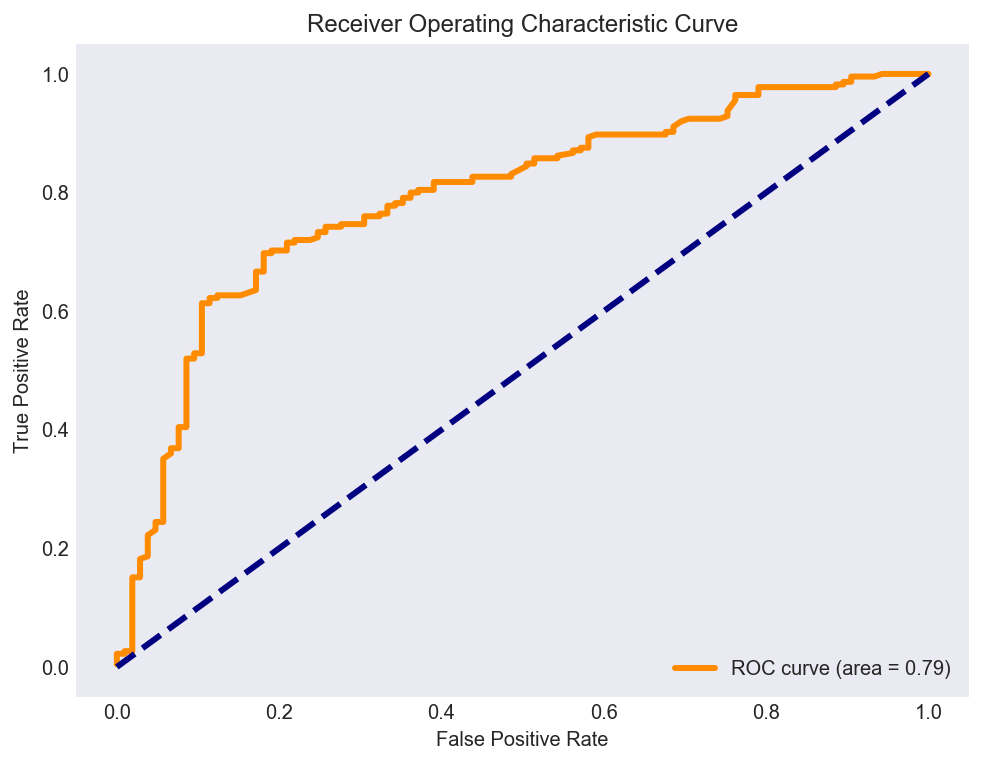

In [111]:
# ROC/AUC plot
fpr, tpr, _ = roc_curve(y_test, y_pred_pp[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=3, c='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linewidth=3, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [112]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, rescaled_features, target, cv=10, scoring='roc_auc').mean()

0.76114285714285712

Seems like we are getting too many cases where we are predicting Class 1 when we should be predicting Class 0. We can adjust this by moving our thresholds around.

In [113]:
# To predict more of Class 0, let's put up the threshold on Class 1 to 60%
pp2 = pp.copy()
pp2['thresh_60'] = [1 if x >= 0.6 else 0 for x in pp['Class 1'].values]
pp2.head(10)

,Class 0,Class 1,thresh_60
0,0.234656,0.765344,1
1,0.373138,0.626862,1
2,0.200973,0.799027,1
3,0.521501,0.478499,0
4,0.110915,0.889085,1
5,0.533962,0.466038,0
6,0.125973,0.874027,1
7,0.303530,0.696470,1
8,0.459952,0.540048,0
9,0.416933,0.583067,0


In [114]:
conmat_thresh_60 = np.array(confusion_matrix(y_test, pp2.thresh_60.values, labels=[0,1]))
conf_thresh_60 = pd.DataFrame(conmat_thresh_10, index=['Class 0', 'Class 1'],
                         columns=['Predicted 0','Predicted 1'])
print 'Confusion matrix with 60% prediction threshold'
conf_thresh_60

Confusion matrix with 60% prediction threshold


,Predicted 0,Predicted 1
Class 0,64,41
Class 1,42,183


In [115]:
# To predict more of Class 0, let's put up the threshold on Class 1 to 70%
pp3 = pp.copy()
pp3['thresh_70'] = [1 if x >= 0.7 else 0 for x in pp['Class 1'].values]
pp3.head()

,Class 0,Class 1,thresh_70
0,0.234656,0.765344,1
1,0.373138,0.626862,0
2,0.200973,0.799027,1
3,0.521501,0.478499,0
4,0.110915,0.889085,1


In [116]:
conmat_thresh_70 = np.array(confusion_matrix(y_test, pp3.thresh_70.values, labels=[0,1]))
conf_thresh_70 = pd.DataFrame(conmat_thresh_70, index=['Class 0', 'Class 1'],
                         columns=['Predicted 0','Predicted 1'])
print 'Confusion matrix with 70% prediction threshold'
conf_thresh_70

Confusion matrix with 70% prediction threshold


,Predicted 0,Predicted 1
Class 0,87,18
Class 1,81,144


In [117]:
# To predict more of Class 0, let's put up the threshold on Class 1 to 70%
pp4 = pp.copy()
pp4['thresh_80'] = [1 if x >= 0.7 else 0 for x in pp['Class 1'].values]
pp4.head()

,Class 0,Class 1,thresh_80
0,0.234656,0.765344,1
1,0.373138,0.626862,0
2,0.200973,0.799027,1
3,0.521501,0.478499,0
4,0.110915,0.889085,1


In [118]:
conmat_thresh_80 = np.array(confusion_matrix(y_test, pp4.thresh_80.values, labels=[0,1]))
conf_thresh_80 = pd.DataFrame(conmat_thresh_80, index=['Class 0', 'Class 1'],
                         columns=['Predicted 0','Predicted 1'])
print 'Confusion matrix with 80% prediction threshold'
conf_thresh_80

Confusion matrix with 80% prediction threshold


,Predicted 0,Predicted 1
Class 0,87,18
Class 1,81,144


### 6. Most important features

In [119]:
# Which are the Top 5 features with the highest discriminative power?
logregcv_df = pd.DataFrame({
    'Feature': featuresdf2.columns,
    'Coefficient': logreg.coef_[0]
},columns=['Feature', 'Coefficient'])
logregcv_df.sort_values('Coefficient', ascending=False, inplace=True)
logregcv_df.head()

,Feature,Coefficient
5,A6,1.120240
6,A7,0.495168
8,A9,0.352419
9,A10,0.100003
12,A13,0.012248
